accuracy:  0.6060606060606061
f1:  0.7111111111111111

classification report:
               precision    recall  f1-score   support

           0       0.50      0.31      0.38        13
           1       0.64      0.80      0.71        20

    accuracy                           0.61        33
   macro avg       0.57      0.55      0.55        33
weighted avg       0.58      0.61      0.58        33



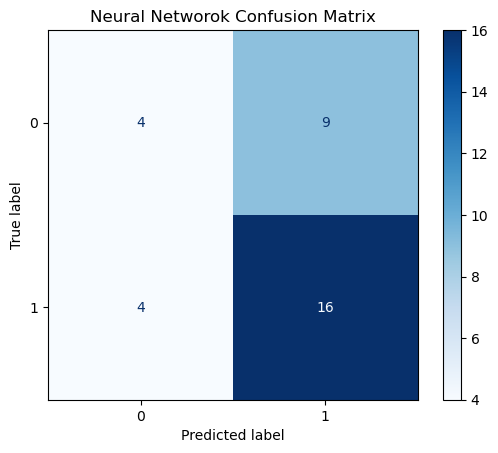

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load data
df = pd.read_csv("resumes_with_labels.csv")
#only keep text and label for this
df = df[["text", "got_internship"]].dropna()

#train test split
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["got_internship"], test_size = 0.2, random_state = 42, stratify = df["got_internship"]
)

#vectorize text
vectorizer = TfidfVectorizer(stop_words = "english", sublinear_tf = True, max_features = 5000, ngram_range = (1, 2), min_df = 3)
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    max_iter=200,
    random_state=42
)

clf.fit(X_train_vector, y_train)
y_prediction = clf.predict(X_test_vector)

print("accuracy: ", accuracy_score(y_test, y_prediction))
print("f1: ", f1_score(y_test, y_prediction))
print("\nclassification report:\n", classification_report(y_test, y_prediction))

ConfusionMatrixDisplay.from_predictions(y_test, y_prediction, cmap="Blues", values_format="d")
plt.title("Neural Network Confusion Matrix")
plt.show()
